# Alumnos

Primeras filas del dataset:
   Puntaje_Lógico_Matemático  Puntaje_Verbal_Lingüístico  \
0                  85.058701                   47.507299   
1                  86.783393                   50.833304   
2                  84.368576                   70.484884   
3                  88.737485                   49.199994   
4                  93.119042                   58.461465   

   Puntaje_Visual_Espacial  Puntaje_Musical  Puntaje_Cinético_Corporal  \
0                80.494374        13.660467                  51.042241   
1                83.254375        33.043745                  48.299763   
2                93.509802        36.048297                  72.846290   
3                81.433720        42.870022                  59.721302   
4                92.452101        47.147788                  51.853508   

   Puntaje_Interpersonal  Puntaje_Intrapersonal  Horas_Estudio_Semanal  \
0              43.022100              48.505955              32.664140   
1              56.

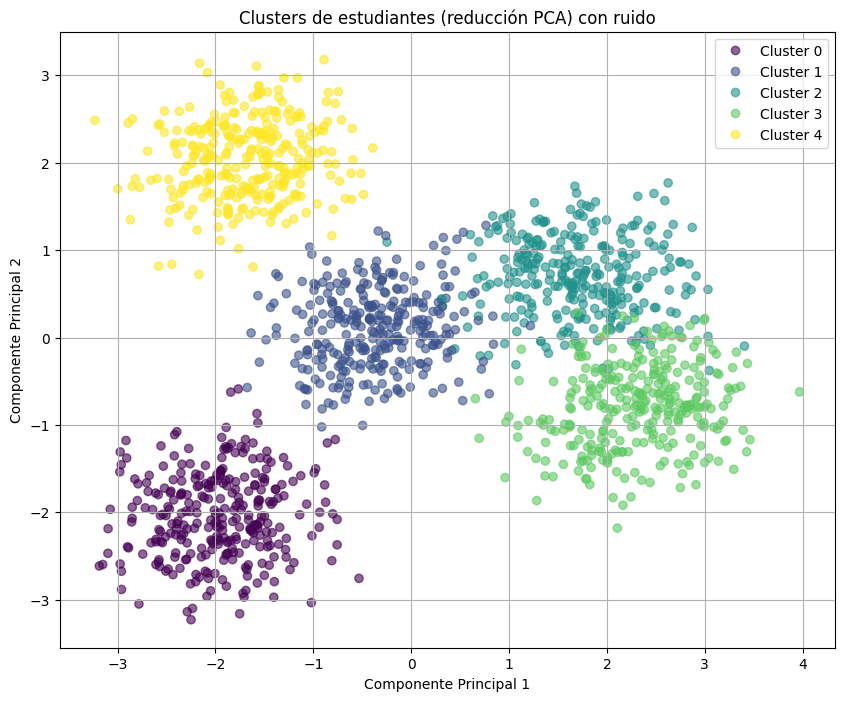

Tabla de contingencia entre Tipología y Cluster:
Cluster                    0    1    2    3    4
Tipología                                       
Artistas_Creativos         0    1    0    0  299
Comunicadores_Sociales   300    0    0    0    0
Estrategas_Solitarios      0    0    0  300    0
Generalistas               0  299    0    0    1
Matematicos_Razonadores    0    1  299    0    0

Centroides de los clusters:
   Puntaje_Lógico_Matemático  Puntaje_Verbal_Lingüístico  \
0                  45.334787                   92.453496   
1                  70.537865                   69.799231   
2                  92.215137                   59.717121   
3                  88.115885                   60.242719   
4                  44.868439                   60.169745   

   Puntaje_Visual_Espacial  Puntaje_Musical  Puntaje_Cinético_Corporal  \
0                40.244148        59.624352                  59.961327   
1                70.371745        69.874026                  69.056239

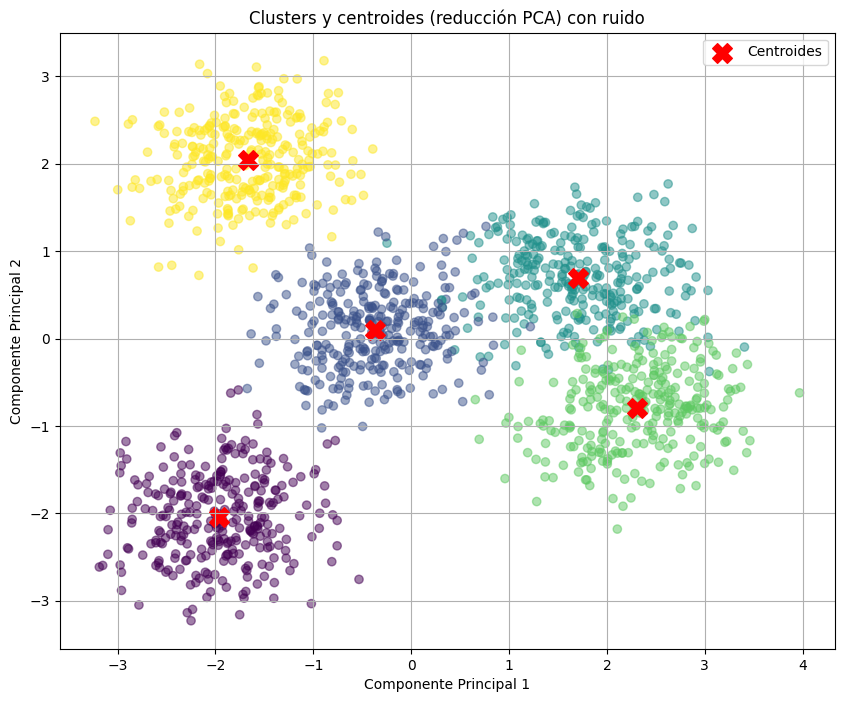

In [1]:
# Código mejorado con ruido añadido para crear el dataset y realizar análisis de clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Semilla para reproducibilidad
np.random.seed(42)

# Número de estudiantes por tipología
n_por_tipologia = 300

# Crear listas para cada variable
Puntaje_Logico_Matematico = []
Puntaje_Verbal_Linguistico = []
Puntaje_Visual_Espacial = []
Puntaje_Musical = []
Puntaje_Cinetico_Corporal = []
Puntaje_Interpersonal = []
Puntaje_Intrapersonal = []
Horas_Estudio_Semanal = []
Participacion_En_Clases = []
Preferencia_Grupal = []

# Tipologías
tipologias = ['Matematicos_Razonadores', 'Comunicadores_Sociales', 'Artistas_Creativos', 'Estrategas_Solitarios', 'Generalistas']

# Lista para almacenar las tipologías de cada estudiante
tipologias_list = []

# Desviación estándar del ruido
noise_std = 5

# Generar datos para cada tipología con ruido
for tipologia in tipologias:
    for _ in range(n_por_tipologia):
        if tipologia == 'Matematicos_Razonadores':
            # Altas puntuaciones en: Lógico-Matemático (>85), Visual-Espacial (>75)
            # Bajas puntuaciones en: Musical (<50), Intrapersonal (<50)
            Puntaje_Logico_Matematico.append(np.random.uniform(85, 100) + np.random.normal(0, noise_std))
            Puntaje_Visual_Espacial.append(np.random.uniform(75, 100) + np.random.normal(0, noise_std))
            Puntaje_Musical.append(np.random.uniform(10, 49) + np.random.normal(0, noise_std))
            Puntaje_Intrapersonal.append(np.random.uniform(30, 49) + np.random.normal(0, noise_std))
            
            # Otras puntuaciones moderadas con ruido
            Puntaje_Verbal_Linguistico.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            Puntaje_Cinetico_Corporal.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            Puntaje_Interpersonal.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            
            # Comportamiento con ruido
            Horas_Estudio_Semanal.append(np.random.uniform(25, 35) + np.random.normal(0, noise_std))
            Participacion_En_Clases.append(np.random.uniform(3, 6) + np.random.normal(0, noise_std/2))
            Preferencia_Grupal.append(0)
        
        elif tipologia == 'Comunicadores_Sociales':
            # Altas puntuaciones en: Verbal-Lingüístico (>85), Interpersonal (>80)
            # Bajas puntuaciones en: Visual-Espacial (<60), Lógico-Matemático (<50)
            Puntaje_Verbal_Linguistico.append(np.random.uniform(85, 100) + np.random.normal(0, noise_std))
            Puntaje_Interpersonal.append(np.random.uniform(80, 100) + np.random.normal(0, noise_std))
            Puntaje_Visual_Espacial.append(np.random.uniform(20, 59) + np.random.normal(0, noise_std))
            Puntaje_Logico_Matematico.append(np.random.uniform(40, 49) + np.random.normal(0, noise_std))
            
            # Otras puntuaciones moderadas con ruido
            Puntaje_Musical.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            Puntaje_Cinetico_Corporal.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            Puntaje_Intrapersonal.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            
            # Comportamiento con ruido
            Horas_Estudio_Semanal.append(np.random.uniform(15, 25) + np.random.normal(0, noise_std))
            Participacion_En_Clases.append(np.random.uniform(7, 10) + np.random.normal(0, noise_std/2))
            Preferencia_Grupal.append(1)
        
        elif tipologia == 'Artistas_Creativos':
            # Altas puntuaciones en: Musical (>90), Visual-Espacial (>80), Cinético-Corporal (>75)
            # Baja puntuación en: Lógico-Matemático (<50)
            Puntaje_Musical.append(np.random.uniform(90, 100) + np.random.normal(0, noise_std))
            Puntaje_Visual_Espacial.append(np.random.uniform(80, 100) + np.random.normal(0, noise_std))
            Puntaje_Cinetico_Corporal.append(np.random.uniform(75, 100) + np.random.normal(0, noise_std))
            Puntaje_Logico_Matematico.append(np.random.uniform(40, 49) + np.random.normal(0, noise_std))
            
            # Otras puntuaciones moderadas con ruido
            Puntaje_Verbal_Linguistico.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            Puntaje_Interpersonal.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            Puntaje_Intrapersonal.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            
            # Comportamiento con ruido
            Horas_Estudio_Semanal.append(np.random.uniform(15, 25) + np.random.normal(0, noise_std))
            Participacion_En_Clases.append(np.random.uniform(5, 8) + np.random.normal(0, noise_std/2))
            Preferencia_Grupal.append(np.random.choice([0,1]))
        
        elif tipologia == 'Estrategas_Solitarios':
            # Altas puntuaciones en: Intrapersonal (>85), Lógico-Matemático (>75)
            # Baja puntuación en: Interpersonal (<50)
            Puntaje_Intrapersonal.append(np.random.uniform(85, 100) + np.random.normal(0, noise_std))
            Puntaje_Logico_Matematico.append(np.random.uniform(75, 100) + np.random.normal(0, noise_std))
            Puntaje_Interpersonal.append(np.random.uniform(10, 49) + np.random.normal(0, noise_std))
            
            # Otras puntuaciones más bajas con ruido
            Puntaje_Verbal_Linguistico.append(np.random.uniform(50, 70) + np.random.normal(0, noise_std))
            Puntaje_Visual_Espacial.append(np.random.uniform(40, 60) + np.random.normal(0, noise_std))
            Puntaje_Musical.append(np.random.uniform(40, 60) + np.random.normal(0, noise_std))
            Puntaje_Cinetico_Corporal.append(np.random.uniform(40, 60) + np.random.normal(0, noise_std))
            
            # Comportamiento con ruido
            Horas_Estudio_Semanal.append(np.random.uniform(25, 35) + np.random.normal(0, noise_std))
            Participacion_En_Clases.append(np.random.uniform(3, 6) + np.random.normal(0, noise_std/2))
            Preferencia_Grupal.append(0)
        
        elif tipologia == 'Generalistas':
            # Equilibrio en todas las puntuaciones con ruido
            Puntaje_Logico_Matematico.append(np.random.uniform(60, 80) + np.random.normal(0, noise_std))
            Puntaje_Verbal_Linguistico.append(np.random.uniform(60, 80) + np.random.normal(0, noise_std))
            Puntaje_Visual_Espacial.append(np.random.uniform(60, 80) + np.random.normal(0, noise_std))
            Puntaje_Musical.append(np.random.uniform(60, 80) + np.random.normal(0, noise_std))
            Puntaje_Cinetico_Corporal.append(np.random.uniform(60, 80) + np.random.normal(0, noise_std))
            Puntaje_Interpersonal.append(np.random.uniform(60, 80) + np.random.normal(0, noise_std))
            Puntaje_Intrapersonal.append(np.random.uniform(60, 80) + np.random.normal(0, noise_std))
            
            # Comportamiento con ruido
            Horas_Estudio_Semanal.append(np.random.uniform(20, 30) + np.random.normal(0, noise_std))
            Participacion_En_Clases.append(np.random.uniform(5, 8) + np.random.normal(0, noise_std/2))
            Preferencia_Grupal.append(np.random.choice([0,1]))
        
        # Añadir la tipología a la lista
        tipologias_list.append(tipologia)

# Limitar los valores al rango especificado y manejar valores atípicos
def limitar_valores(lista, minimo, maximo):
    return [min(max(valor, minimo), maximo) for valor in lista]

Puntaje_Logico_Matematico = limitar_valores(Puntaje_Logico_Matematico, 40, 100)
Puntaje_Verbal_Linguistico = limitar_valores(Puntaje_Verbal_Linguistico, 30, 100)
Puntaje_Visual_Espacial = limitar_valores(Puntaje_Visual_Espacial, 20, 100)
Puntaje_Musical = limitar_valores(Puntaje_Musical, 10, 100)
Puntaje_Cinetico_Corporal = limitar_valores(Puntaje_Cinetico_Corporal, 20, 100)
Puntaje_Interpersonal = limitar_valores(Puntaje_Interpersonal, 10, 100)
Puntaje_Intrapersonal = limitar_valores(Puntaje_Intrapersonal, 30, 100)
Horas_Estudio_Semanal = limitar_valores(Horas_Estudio_Semanal, 5, 40)
Participacion_En_Clases = limitar_valores(Participacion_En_Clases, 1, 10)

# Crear el DataFrame
data = {
    'Puntaje_Lógico_Matemático': Puntaje_Logico_Matematico,
    'Puntaje_Verbal_Lingüístico': Puntaje_Verbal_Linguistico,
    'Puntaje_Visual_Espacial': Puntaje_Visual_Espacial,
    'Puntaje_Musical': Puntaje_Musical,
    'Puntaje_Cinético_Corporal': Puntaje_Cinetico_Corporal,
    'Puntaje_Interpersonal': Puntaje_Interpersonal,
    'Puntaje_Intrapersonal': Puntaje_Intrapersonal,
    'Horas_Estudio_Semanal': Horas_Estudio_Semanal,
    'Participación_En_Clases': Participacion_En_Clases,
    'Preferencia_Grupal': Preferencia_Grupal,
    'Tipología': tipologias_list
}

df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del dataset:")
print(df.head())

# Guardar el DataFrame en un archivo CSV
df.to_csv('dataset_estudiantes_con_ruido.csv', index=False)

# ------------------------------
# Análisis de Clustering
# ------------------------------

# Preparar los datos para el clustering
variables_numericas = [
    'Puntaje_Lógico_Matemático',
    'Puntaje_Verbal_Lingüístico',
    'Puntaje_Visual_Espacial',
    'Puntaje_Musical',
    'Puntaje_Cinético_Corporal',
    'Puntaje_Interpersonal',
    'Puntaje_Intrapersonal',
    'Horas_Estudio_Semanal',
    'Participación_En_Clases'
]

X = df[variables_numericas]

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means con K=5
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clusters al DataFrame
df['Cluster'] = clusters

# Visualizar los clusters en el espacio reducido por PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters, cmap='viridis', alpha=0.6
)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de estudiantes (reducción PCA) con ruido')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(k_optimo)])
plt.grid(True)
plt.show()

# Analizar cómo se relacionan los clusters con las tipologías
tabla_contingencia = pd.crosstab(df['Tipología'], df['Cluster'])
print("Tabla de contingencia entre Tipología y Cluster:")
print(tabla_contingencia)

# Visualizar los centroides
centroides = kmeans.cluster_centers_

# Desescalar los centroides
centroides_desescalados = scaler.inverse_transform(centroides)
centroides_df = pd.DataFrame(centroides_desescalados, columns=variables_numericas)

print("\nCentroides de los clusters:")
print(centroides_df)

# Interpretar los centroides
for i, row in centroides_df.iterrows():
    print(f"\nCaracterísticas del Cluster {i}:")
    for variable in variables_numericas:
        print(f"  {variable}: {row[variable]:.2f}")

# Visualizar los centroides en el espacio PCA
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
centroids_pca = pca.transform(centroides)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters y centroides (reducción PCA) con ruido')
plt.legend()
plt.grid(True)
plt.show()


# Paso 1: Análisis de los Centroides de los Clusters con Clasificaciones

A continuación, se presenta una tabla con los centroides de cada cluster y, al lado de cada valor, su clasificación relativa (Bajo, Medio, Alto) en comparación con los demás clusters.

## **Centroides de los Clusters con Clasificaciones**

| **Variable**                 | **Cluster 0**           | **Cluster 1**             | **Cluster 2**           | **Cluster 3**           | **Cluster 4**           |
|-------------------------------|-------------------------|---------------------------|-------------------------|-------------------------|-------------------------|
| **Puntaje Lógico-Matemático** | 45.33 (Bajo)           | 70.54 (Medio-Alto)        | 92.22 (Muy Alto)        | 88.12 (Alto)           | 44.87 (Bajo)           |
| **Puntaje Verbal-Lingüístico**| 92.45 (Muy Alto)       | 69.80 (Medio-Alto)        | 59.72 (Medio)           | 60.24 (Medio)          | 60.17 (Medio)          |
| **Puntaje Visual-Espacial**   | 40.24 (Bajo)           | 70.37 (Medio-Alto)        | 87.03 (Alto)           | 50.31 (Medio)          | 89.79 (Muy Alto)       |
| **Puntaje Musical**           | 59.62 (Medio)          | 69.87 (Alto)              | 28.74 (Bajo)           | 50.24 (Medio)          | 94.29 (Muy Alto)       |
| **Puntaje Cinético-Corporal** | 59.96 (Medio)          | 69.06 (Alto)              | 60.04 (Medio)          | 50.37 (Medio)          | 87.02 (Muy Alto)       |
| **Puntaje Interpersonal**     | 88.88 (Muy Alto)       | 69.86 (Alto)              | 59.68 (Medio)          | 30.52 (Bajo)           | 59.97 (Medio)          |
| **Puntaje Intrapersonal**     | 59.24 (Medio)          | 70.01 (Alto)              | 39.00 (Bajo)           | 92.57 (Muy Alto)       | 59.13 (Medio)          |
| **Horas Estudio Semanal**     | 20.26 (Bajo)           | 24.84 (Medio)             | 30.09 (Alto)           | 29.44 (Alto)           | 20.15 (Bajo)           |
| **Participación en Clases**   | 7.77 (Alto)            | 6.45 (Medio)              | 4.70 (Bajo)            | 4.69 (Bajo)            | 6.33 (Medio)           |

---

# Paso 2: Construcción de las Tipologías Basadas en los Clusters

## **Cluster 0**
### **Características Clave**:
- **Puntaje Lógico-Matemático**: Bajo
- **Puntaje Verbal-Lingüístico**: Muy Alto
- **Puntaje Visual-Espacial**: Bajo
- **Puntaje Musical**: Medio
- **Puntaje Cinético-Corporal**: Medio
- **Puntaje Interpersonal**: Muy Alto
- **Puntaje Intrapersonal**: Medio
- **Horas Estudio Semanal**: Bajo
- **Participación en Clases**: Alto

### **Tipología Construida**:
**"Comunicadores Sociales Extrovertidos"**

### **Descripción**:
Individuos con excelentes habilidades verbales y sociales, que sobresalen en comunicación y trabajo en equipo. Son participativos en clase y disfrutan de interacciones sociales. Su enfoque está en áreas relacionadas con las humanidades, artes y ciencias sociales. Tienen menor interés o habilidad en áreas lógico-matemáticas y visuales-espaciales.

---

## **Cluster 1**
### **Características Clave**:
- **Puntaje Lógico-Matemático**: Medio-Alto
- **Puntaje Verbal-Lingüístico**: Medio-Alto
- **Puntaje Visual-Espacial**: Medio-Alto
- **Puntaje Musical**: Alto
- **Puntaje Cinético-Corporal**: Alto
- **Puntaje Interpersonal**: Alto
- **Puntaje Intrapersonal**: Alto
- **Horas Estudio Semanal**: Medio
- **Participación en Clases**: Medio

### **Tipología Construida**:
**"Generalistas Multifacéticos"**

### **Descripción**:
Personas con habilidades equilibradas en múltiples áreas, mostrando competencia tanto en disciplinas académicas como artísticas. Son versátiles y pueden adaptarse a diferentes campos, destacando en entornos que requieren habilidades diversas. Su participación y dedicación al estudio es moderada.

---

## **Cluster 2**
### **Características Clave**:
- **Puntaje Lógico-Matemático**: Muy Alto
- **Puntaje Verbal-Lingüístico**: Medio
- **Puntaje Visual-Espacial**: Alto
- **Puntaje Musical**: Bajo
- **Puntaje Cinético-Corporal**: Medio
- **Puntaje Interpersonal**: Medio
- **Puntaje Intrapersonal**: Bajo
- **Horas Estudio Semanal**: Alto
- **Participación en Clases**: Bajo

### **Tipología Construida**:
**"Matemáticos y Analistas Visuales"**

### **Descripción**:
Individuos con excepcional capacidad en razonamiento lógico-matemático y habilidades visuales-espaciales. Tienden a ser más introvertidos y prefieren el estudio individual. Destacan en áreas como matemáticas, física, ingeniería y arquitectura. Su participación en clase es limitada, enfocándose más en tareas y proyectos individuales.

---

## **Cluster 3**
### **Características Clave**:
- **Puntaje Lógico-Matemático**: Alto
- **Puntaje Verbal-Lingüístico**: Medio
- **Puntaje Visual-Espacial**: Medio
- **Puntaje Musical**: Medio
- **Puntaje Cinético-Corporal**: Medio
- **Puntaje Interpersonal**: Bajo
- **Puntaje Intrapersonal**: Muy Alto
- **Horas Estudio Semanal**: Alto
- **Participación en Clases**: Bajo

### **Tipología Construida**:
**"Estrategas Solitarios Reflexivos"**

### **Descripción**:
Personas con alta capacidad analítica y profunda autoconciencia. Prefieren trabajar de manera independiente y tienen poca inclinación hacia interacciones sociales. Son metódicos y estratégicos, dedicando mucho tiempo al estudio y reflexión. Pueden sobresalir en áreas como investigación, ciencias de la computación y planificación estratégica.

---

## **Cluster 4**
### **Características Clave**:
- **Puntaje Lógico-Matemático**: Bajo
- **Puntaje Verbal-Lingüístico**: Medio
- **Puntaje Visual-Espacial**: Muy Alto
- **Puntaje Musical**: Muy Alto
- **Puntaje Cinético-Corporal**: Muy Alto
- **Puntaje Interpersonal**: Medio
- **Puntaje Intrapersonal**: Medio
- **Horas Estudio Semanal**: Bajo
- **Participación en Clases**: Medio

### **Tipología Construida**:
**"Artistas Creativos y Expresivos"**

### **Descripción**:
Individuos con talentos excepcionales en artes visuales, música y expresión corporal. Tienen una fuerte inclinación hacia actividades creativas y artísticas. Su habilidad lógico-matemática es menor, y prefieren aprender a través de experiencias prácticas y expresivas. Pueden destacar en campos como artes plásticas, música, danza y diseño.


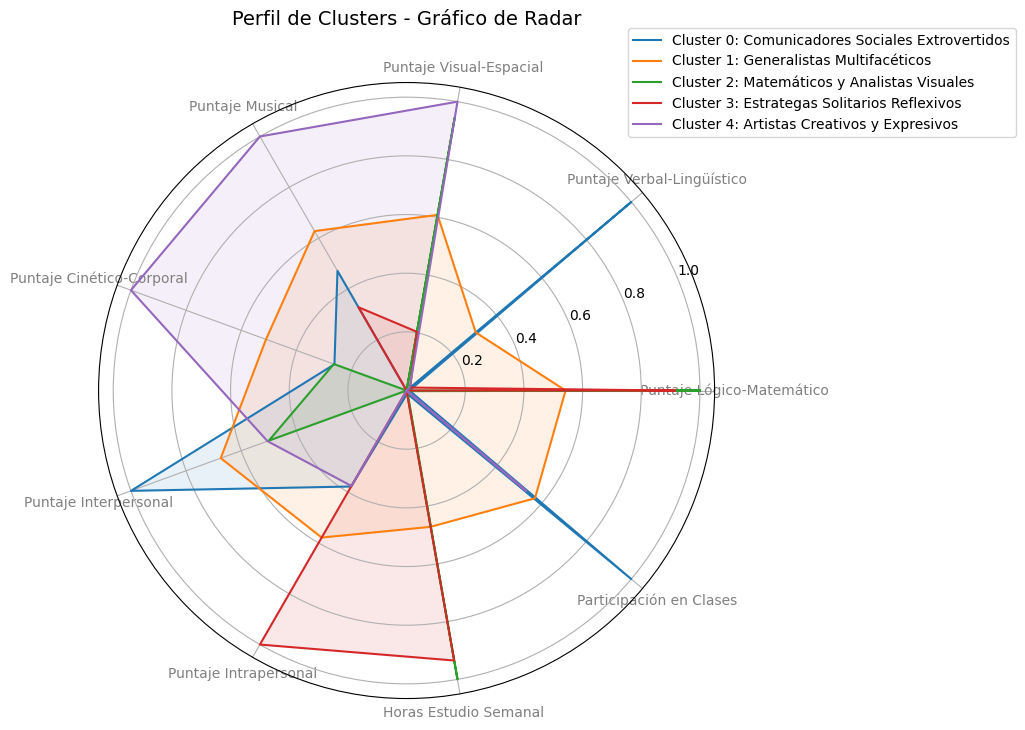

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Datos de los centroides
variables = [
    'Puntaje Lógico-Matemático', 'Puntaje Verbal-Lingüístico',
    'Puntaje Visual-Espacial', 'Puntaje Musical', 'Puntaje Cinético-Corporal',
    'Puntaje Interpersonal', 'Puntaje Intrapersonal', 'Horas Estudio Semanal',
    'Participación en Clases'
]

clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

datos = [
    [45.33, 70.54, 92.22, 88.12, 44.87],  # Puntaje Lógico-Matemático
    [92.45, 69.80, 59.72, 60.24, 60.17],  # Puntaje Verbal-Lingüístico
    [40.24, 70.37, 87.03, 50.31, 89.79],  # Puntaje Visual-Espacial
    [59.62, 69.87, 28.74, 50.24, 94.29],  # Puntaje Musical
    [59.96, 69.06, 60.04, 50.37, 87.02],  # Puntaje Cinético-Corporal
    [88.88, 69.86, 59.68, 30.52, 59.97],  # Puntaje Interpersonal
    [59.24, 70.01, 39.00, 92.57, 59.13],  # Puntaje Intrapersonal
    [20.26, 24.84, 30.09, 29.44, 20.15],  # Horas Estudio Semanal
    [7.77, 6.45, 4.70, 4.69, 6.33],       # Participación en Clases
]

# Transponer los datos para crear el DataFrame
datos_transpuestos = list(map(list, zip(*datos)))
df = pd.DataFrame(datos_transpuestos, columns=variables, index=clusters)

# Lista de tipologías correspondientes a cada cluster
tipologias = [
    'Comunicadores Sociales Extrovertidos',   # Cluster 0
    'Generalistas Multifacéticos',            # Cluster 1
    'Matemáticos y Analistas Visuales',       # Cluster 2
    'Estrategas Solitarios Reflexivos',       # Cluster 3
    'Artistas Creativos y Expresivos'         # Cluster 4
]

# Normalizar los datos
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=variables, index=clusters)

# Añadir la primera fila al final para cerrar el gráfico de radar
df_normalizado = pd.concat([df_normalizado, df_normalizado.iloc[[0]]], ignore_index=True)

# Ángulos para el gráfico
categorias = list(df_normalizado.columns)
N = len(categorias)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]

# Crear el gráfico
plt.figure(figsize=(10, 8))

for i in range(len(df_normalizado)-1):
    valores = df_normalizado.iloc[i].values.flatten().tolist()
    valores += valores[:1]
    etiqueta = f'Cluster {i}: {tipologias[i]}'
    plt.polar(angulos, valores, label=etiqueta)
    plt.fill(angulos, valores, alpha=0.1)

plt.xticks(angulos[:-1], categorias, color='grey', size=10)
plt.title('Perfil de Clusters - Gráfico de Radar', size=14, y=1.08)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))
plt.show()


# 2. investigadores 

Primeras filas del dataset:
   Publicaciones_Anuales  Citas_Totales   Índice_H  \
0              11.297589    3748.357077  34.308678   
1              10.313137    3268.291154  32.671351   
2              12.332768    4232.824384  33.871118   
3               8.337469    3199.146694  44.261391   
4               9.840467    3869.233290  35.856841   

   Colaboración_Internacional  Horas_Docencia_Semanal  Financiamiento_Anual  \
0                   40.230299                8.158426         376743.472915   
1                    5.867198                2.974338         331424.733260   
2                   10.752518                2.698013         337569.801835   
3                   14.422891                5.417727         104032.987612   
4                   21.988963                4.078722         405712.222622   

   Estudiantes_PHD_Supervisados  Índice_Interdisciplinario  \
0                      2.531693                  32.957884   
1                      0.000000                 

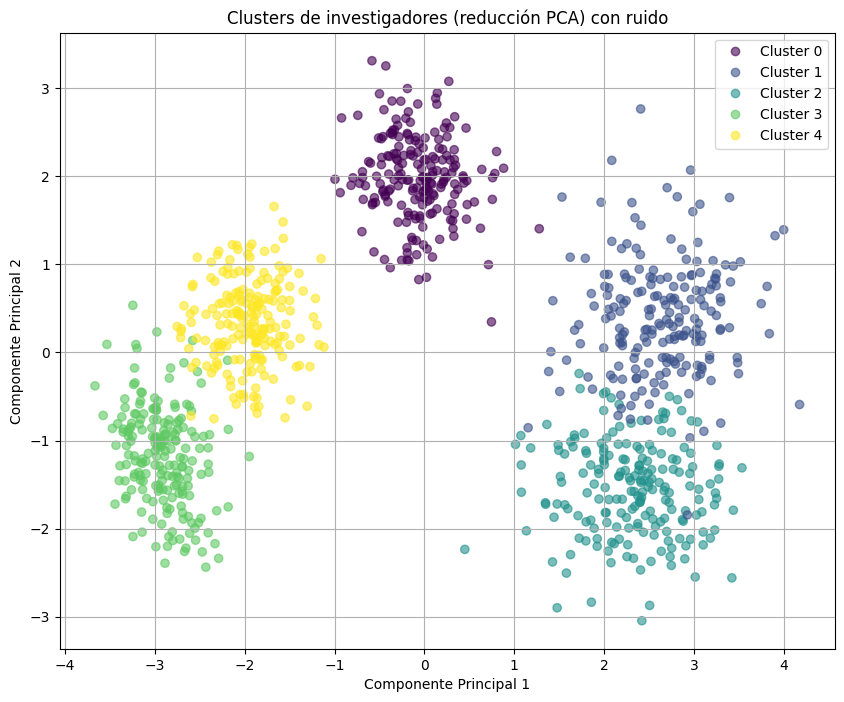

Tabla de contingencia entre Tipología y Cluster:
Cluster                      0    1    2    3    4
Tipología                                         
Colaboradores_Globales     200    0    0    0    0
Docentes_Dedicados           0    0    0  199    1
Gestores_de_Fondos           0  199    1    0    0
Innovadores_Solitarios       1    0  199    0    0
Investigadores_Emergentes    0    0    0    1  199

Centroides de los clusters:
   Publicaciones_Anuales  Citas_Totales   Índice_H  \
0              10.159891    2052.590263  24.769614   
1              14.912638    2477.110813  28.291873   
2              11.841026    3513.799414  35.198083   
3               3.010864     291.958554   9.717939   
4               4.000886     777.533989   7.832204   

   Colaboración_Internacional  Horas_Docencia_Semanal  Financiamiento_Anual  \
0                   79.781220                7.812044         146671.890551   
1                   48.693664                4.080081         617077.317776   
2  

In [3]:
# Código para crear el dataset de tipos de investigadores y realizar análisis de clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Semilla para reproducibilidad
np.random.seed(42)

# Número de investigadores por tipología
n_por_tipologia = 200

# Crear listas para cada variable
Publicaciones_Anuales = []
Citas_Totales = []
Indice_H = []
Colaboracion_Internacional = []
Horas_Docencia_Semanal = []
Financiamiento_Anual = []
Estudiantes_PHD_Supervisados = []
Indice_Interdisciplinario = []
Asistencia_Conferencias_Anual = []
Papers_En_Revistas_Top = []

# Lista para almacenar las tipologías de cada investigador
tipologias = ['Innovadores_Solitarios', 'Colaboradores_Globales', 'Docentes_Dedicados', 'Gestores_de_Fondos', 'Investigadores_Emergentes']
tipologias_list = []

# Desviación estándar del ruido
noise_std = 5

# Generar datos para cada tipología con ruido
for tipologia in tipologias:
    for _ in range(n_por_tipologia):
        if tipologia == 'Innovadores_Solitarios':
            # Altas puntuaciones en: Citas_Totales, Índice_H, Papers_En_Revistas_Top
            # Bajas puntuaciones en: Colaboración_Internacional, Estudiantes_PHD_Supervisados
            Citas_Totales.append(np.random.normal(3500, 500))
            Indice_H.append(np.random.normal(35, 5))
            Papers_En_Revistas_Top.append(np.random.normal(6, 2))
            Colaboracion_Internacional.append(np.random.normal(25, 10))
            Estudiantes_PHD_Supervisados.append(np.random.normal(3, 2))
            
            # Otras variables
            Publicaciones_Anuales.append(np.random.normal(12, 3))
            Horas_Docencia_Semanal.append(np.random.normal(5, 2))
            Financiamiento_Anual.append(np.random.normal(300000, 100000))
            Indice_Interdisciplinario.append(np.random.normal(40, 15))
            Asistencia_Conferencias_Anual.append(np.random.normal(3, 1))
            
        elif tipologia == 'Colaboradores_Globales':
            # Altas puntuaciones en: Colaboración_Internacional, Estudiantes_PHD_Supervisados, Índice_Interdisciplinario
            # Bajas puntuaciones en: Horas_Docencia_Semanal, Financiamiento_Anual
            Colaboracion_Internacional.append(np.random.normal(80, 10))
            Estudiantes_PHD_Supervisados.append(np.random.normal(12, 2))
            Indice_Interdisciplinario.append(np.random.normal(75, 10))
            Horas_Docencia_Semanal.append(np.random.normal(8, 2))
            Financiamiento_Anual.append(np.random.normal(150000, 50000))
            
            # Otras variables
            Citas_Totales.append(np.random.normal(2000, 500))
            Indice_H.append(np.random.normal(25, 5))
            Papers_En_Revistas_Top.append(np.random.normal(4, 1))
            Publicaciones_Anuales.append(np.random.normal(10, 2))
            Asistencia_Conferencias_Anual.append(np.random.normal(5, 1))
            
        elif tipologia == 'Docentes_Dedicados':
            # Altas puntuaciones en: Horas_Docencia_Semanal, Estudiantes_PHD_Supervisados
            # Bajas puntuaciones en: Publicaciones_Anuales, Citas_Totales, Financiamiento_Anual
            Horas_Docencia_Semanal.append(np.random.normal(18, 2))
            Estudiantes_PHD_Supervisados.append(np.random.normal(10, 2))
            Publicaciones_Anuales.append(np.random.normal(3, 1))
            Citas_Totales.append(np.random.normal(300, 100))
            Financiamiento_Anual.append(np.random.normal(80000, 20000))
            
            # Otras variables
            Indice_H.append(np.random.normal(10, 3))
            Colaboracion_Internacional.append(np.random.normal(30, 10))
            Indice_Interdisciplinario.append(np.random.normal(50, 15))
            Asistencia_Conferencias_Anual.append(np.random.normal(2, 1))
            Papers_En_Revistas_Top.append(np.random.normal(1, 1))
            
        elif tipologia == 'Gestores_de_Fondos':
            # Altas puntuaciones en: Financiamiento_Anual, Publicaciones_Anuales, Asistencia_Conferencias_Anual
            # Bajas puntuaciones en: Horas_Docencia_Semanal, Índice_Interdisciplinario
            Financiamiento_Anual.append(np.random.normal(600000, 100000))
            Publicaciones_Anuales.append(np.random.normal(15, 3))
            Asistencia_Conferencias_Anual.append(np.random.normal(7, 2))
            Horas_Docencia_Semanal.append(np.random.normal(4, 2))
            Indice_Interdisciplinario.append(np.random.normal(35, 10))
            
            # Otras variables
            Citas_Totales.append(np.random.normal(2500, 500))
            Indice_H.append(np.random.normal(28, 5))
            Estudiantes_PHD_Supervisados.append(np.random.normal(8, 2))
            Colaboracion_Internacional.append(np.random.normal(50, 15))
            Papers_En_Revistas_Top.append(np.random.normal(5, 1))
            
        elif tipologia == 'Investigadores_Emergentes':
            # Altas puntuaciones en: Índice_Interdisciplinario, Colaboración_Internacional
            # Bajas puntuaciones en: Índice_H, Citas_Totales, Publicaciones_Anuales
            Indice_Interdisciplinario.append(np.random.normal(70, 10))
            Colaboracion_Internacional.append(np.random.normal(65, 10))
            Indice_H.append(np.random.normal(8, 2))
            Citas_Totales.append(np.random.normal(800, 200))
            Publicaciones_Anuales.append(np.random.normal(4, 1))
            
            # Otras variables
            Horas_Docencia_Semanal.append(np.random.normal(12, 3))
            Financiamiento_Anual.append(np.random.normal(120000, 30000))
            Estudiantes_PHD_Supervisados.append(np.random.normal(5, 2))
            Asistencia_Conferencias_Anual.append(np.random.normal(4, 1))
            Papers_En_Revistas_Top.append(np.random.normal(2, 1))
            
        # Añadir la tipología a la lista
        tipologias_list.append(tipologia)

# Limitar los valores al rango especificado y manejar valores atípicos
def limitar_valores(lista, minimo, maximo):
    return [min(max(valor, minimo), maximo) for valor in lista]

Publicaciones_Anuales = limitar_valores(Publicaciones_Anuales, 0, 20)
Citas_Totales = limitar_valores(Citas_Totales, 0, 5000)
Indice_H = limitar_valores(Indice_H, 0, 50)
Colaboracion_Internacional = limitar_valores(Colaboracion_Internacional, 0, 100)
Horas_Docencia_Semanal = limitar_valores(Horas_Docencia_Semanal, 0, 20)
Financiamiento_Anual = limitar_valores(Financiamiento_Anual, 0, 1000000)
Estudiantes_PHD_Supervisados = limitar_valores(Estudiantes_PHD_Supervisados, 0, 15)
Indice_Interdisciplinario = limitar_valores(Indice_Interdisciplinario, 0, 100)
Asistencia_Conferencias_Anual = limitar_valores(Asistencia_Conferencias_Anual, 0, 10)
Papers_En_Revistas_Top = limitar_valores(Papers_En_Revistas_Top, 0, 10)

# Crear el DataFrame
data = {
    'Publicaciones_Anuales': Publicaciones_Anuales,
    'Citas_Totales': Citas_Totales,
    'Índice_H': Indice_H,
    'Colaboración_Internacional': Colaboracion_Internacional,
    'Horas_Docencia_Semanal': Horas_Docencia_Semanal,
    'Financiamiento_Anual': Financiamiento_Anual,
    'Estudiantes_PHD_Supervisados': Estudiantes_PHD_Supervisados,
    'Índice_Interdisciplinario': Indice_Interdisciplinario,
    'Asistencia_Conferencias_Anual': Asistencia_Conferencias_Anual,
    'Papers_En_Revistas_Top': Papers_En_Revistas_Top,
    'Tipología': tipologias_list
}

df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
print("Primeras filas del dataset:")
print(df.head())

# Guardar el DataFrame en un archivo CSV
df.to_csv('dataset_investigadores.csv', index=False)

# ------------------------------
# Análisis de Clustering
# ------------------------------

# Preparar los datos para el clustering
variables_numericas = [
    'Publicaciones_Anuales',
    'Citas_Totales',
    'Índice_H',
    'Colaboración_Internacional',
    'Horas_Docencia_Semanal',
    'Financiamiento_Anual',
    'Estudiantes_PHD_Supervisados',
    'Índice_Interdisciplinario',
    'Asistencia_Conferencias_Anual',
    'Papers_En_Revistas_Top'
]

X = df[variables_numericas]

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means con K=5
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Añadir los clusters al DataFrame
df['Cluster'] = clusters

# Visualizar los clusters en el espacio reducido por PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters, cmap='viridis', alpha=0.6
)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de investigadores (reducción PCA) con ruido')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(k_optimo)])
plt.grid(True)
plt.show()

# Analizar cómo se relacionan los clusters con las tipologías
tabla_contingencia = pd.crosstab(df['Tipología'], df['Cluster'])
print("Tabla de contingencia entre Tipología y Cluster:")
print(tabla_contingencia)

# Visualizar los centroides
centroides = kmeans.cluster_centers_

# Desescalar los centroides
centroides_desescalados = scaler.inverse_transform(centroides)
centroides_df = pd.DataFrame(centroides_desescalados, columns=variables_numericas)

print("\nCentroides de los clusters:")
print(centroides_df)

# Interpretar los centroides
for i, row in centroides_df.iterrows():
    print(f"\nCaracterísticas del Cluster {i}:")
    for variable in variables_numericas:
        print(f"  {variable}: {row[variable]:.2f}")


## Paso 1: Análisis de los Centroides de los Clusters

A continuación, se presenta una tabla con los centroides de cada cluster y, al lado de cada valor, su clasificación correspondiente basada en su posición relativa respecto a los demás clusters.

## **Centroides de los Clusters con Clasificaciones**

| **Variable**                   | **Cluster 0**             | **Cluster 1**             | **Cluster 2**             | **Cluster 3**             | **Cluster 4**             |
|--------------------------------|---------------------------|---------------------------|---------------------------|---------------------------|---------------------------|
| **Publicaciones Anuales**      | 10.16 (Media-Alta)        | 14.91 (Alta)             | 11.84 (Alta)             | 3.01 (Baja)              | 4.00 (Baja)              |
| **Citas Totales**              | 2052.59 (Media)           | 2477.11 (Media-Alta)     | 3513.80 (Alta)           | 291.96 (Baja)            | 777.53 (Baja)            |
| **Índice H**                   | 24.77 (Media)             | 28.29 (Media-Alta)       | 35.20 (Alta)             | 9.72 (Baja)              | 7.83 (Baja)              |
| **Colaboración Internacional (%)** | 79.78% (Muy Alta)        | 48.69% (Media)           | 25.37% (Baja)            | 29.51% (Baja)            | 66.28% (Alta)            |
| **Horas Docencia Semanal**     | 7.81 (Media)              | 4.08 (Baja)              | 4.90 (Baja)              | 17.77 (Alta)             | 11.89 (Media-Alta)       |
| **Financiamiento Anual (USD)** | $146,671.89 (Media)       | $617,077.32 (Alta)       | $310,516.99 (Media-Alta) | $79,903.20 (Baja)        | $122,168.49 (Media-Baja) |
| **Estudiantes PhD Supervisados** | 11.96 (Alta)             | 7.90 (Media)             | 3.27 (Baja)              | 9.94 (Media-Alta)        | 5.19 (Media-Baja)        |
| **Índice Interdisciplinario**  | 74.99 (Alta)              | 35.33 (Baja)             | 40.58 (Baja)             | 49.70 (Media)            | 68.67 (Media-Alta)       |
| **Asistencia a Conferencias Anual** | 5.05 (Media)           | 6.84 (Alta)              | 3.15 (Baja)              | 1.86 (Baja)              | 4.00 (Media)             |
| **Papers en Revistas Top**     | 3.90 (Media)              | 4.92 (Media-Alta)        | 6.01 (Alta)              | 1.08 (Baja)              | 2.06 (Baja)              |

---

## Paso 2: Construcción de las Tipologías Basadas en los Clusters

## **Cluster 0**
### **Características Clave**:
- **Publicaciones Anuales**: 10.16 (Media-Alta)
- **Citas Totales**: 2052.59 (Media)
- **Índice H**: 24.77 (Media)
- **Colaboración Internacional**: 79.78% (Muy Alta)
- **Horas Docencia Semanal**: 7.81 (Media)
- **Financiamiento Anual**: $146,671.89 (Media)
- **Estudiantes PhD Supervisados**: 11.96 (Alta)
- **Índice Interdisciplinario**: 74.99 (Alta)
- **Asistencia a Conferencias Anual**: 5.05 (Media)
- **Papers en Revistas Top**: 3.90 (Media)

### **Tipología Construida**:
**"Investigadores Colaboradores Internacionales Interdisciplinarios"**

### **Descripción**:
Este grupo de investigadores se caracteriza por una alta colaboración internacional y un enfoque interdisciplinario. Supervisan un número elevado de estudiantes de doctorado y tienen una productividad académica media-alta. Su participación en conferencias es moderada y publican en revistas reconocidas.

---

## **Cluster 1**
### **Características Clave**:
- **Publicaciones Anuales**: 14.91 (Alta)
- **Citas Totales**: 2477.11 (Media-Alta)
- **Índice H**: 28.29 (Media-Alta)
- **Colaboración Internacional**: 48.69% (Media)
- **Horas Docencia Semanal**: 4.08 (Baja)
- **Financiamiento Anual**: $617,077.32 (Alta)
- **Estudiantes PhD Supervisados**: 7.90 (Media)
- **Índice Interdisciplinario**: 35.33 (Baja)
- **Asistencia a Conferencias Anual**: 6.84 (Alta)
- **Papers en Revistas Top**: 4.92 (Media-Alta)

### **Tipología Construida**:
**"Investigadores Altamente Productivos y Financiados"**

### **Descripción**:
Investigadores con alta productividad en publicaciones y una capacidad destacada para obtener financiamiento significativo. Dedican menos tiempo a la docencia y se enfocan en áreas especializadas, con menor énfasis en colaboración internacional e interdisciplinaria. Asisten frecuentemente a conferencias y tienen una presencia notable en revistas de alto impacto.

---

## **Cluster 2**
### **Características Clave**:
- **Publicaciones Anuales**: 11.84 (Alta)
- **Citas Totales**: 3513.80 (Alta)
- **Índice H**: 35.20 (Alta)
- **Colaboración Internacional**: 25.37% (Baja)
- **Horas Docencia Semanal**: 4.90 (Baja)
- **Financiamiento Anual**: $310,516.99 (Media-Alta)
- **Estudiantes PhD Supervisados**: 3.27 (Baja)
- **Índice Interdisciplinario**: 40.58 (Baja)
- **Asistencia a Conferencias Anual**: 3.15 (Baja)
- **Papers en Revistas Top**: 6.01 (Alta)

### **Tipología Construida**:
**"Investigadores de Alto Impacto y Enfoque Individual"**

### **Descripción**:
Investigadores que alcanzan un alto impacto académico reflejado en un elevado número de citas y un índice H alto. Operan con baja colaboración internacional y supervisan pocos estudiantes de doctorado, indicando un enfoque más individualista. Publican frecuentemente en revistas de prestigio, pero tienen menor participación en conferencias y actividades interdisciplinarias.

---

## **Cluster 3**
### **Características Clave**:
- **Publicaciones Anuales**: 3.01 (Baja)
- **Citas Totales**: 291.96 (Baja)
- **Índice H**: 9.72 (Baja)
- **Colaboración Internacional**: 29.51% (Baja)
- **Horas Docencia Semanal**: 17.77 (Alta)
- **Financiamiento Anual**: $79,903.20 (Baja)
- **Estudiantes PhD Supervisados**: 9.94 (Media-Alta)
- **Índice Interdisciplinario**: 49.70 (Media)
- **Asistencia a Conferencias Anual**: 1.86 (Baja)
- **Papers en Revistas Top**: 1.08 (Baja)

### **Tipología Construida**:
**"Docentes Dedicados a la Enseñanza y Formación"**

### **Descripción**:
Este grupo está altamente enfocado en la docencia, con una carga horaria docente muy elevada. Aunque supervisan a un número considerable de estudiantes de doctorado, su producción científica es baja en términos de publicaciones y citas. Su participación en actividades de investigación y colaboración internacional es limitada.

---

## **Cluster 4**
### **Características Clave**:
- **Publicaciones Anuales**: 4.00 (Baja)
- **Citas Totales**: 777.53 (Baja)
- **Índice H**: 7.83 (Baja)
- **Colaboración Internacional**: 66.28% (Alta)
- **Horas Docencia Semanal**: 11.89 (Media-Alta)
- **Financiamiento Anual**: $122,168.49 (Media-Baja)
- **Estudiantes PhD Supervisados**: 5.19 (Media-Baja)
- **Índice Interdisciplinario**: 68.67 (Media-Alta)
- **Asistencia a Conferencias Anual**: 4.00 (Media)
- **Papers en Revistas Top**: 2.06 (Baja)

### **Tipología Construida**:
**"Investigadores Colaborativos en Desarrollo"**

### **Descripción**:
Investigadores que participan activamente en colaboraciones internacionales y proyectos interdisciplinarios, aunque su producción científica y reconocimiento aún son bajos. Dedican una cantidad considerable de tiempo a la docencia y están en proceso de desarrollo profesional, posiblemente emergiendo en sus carreras académicas.

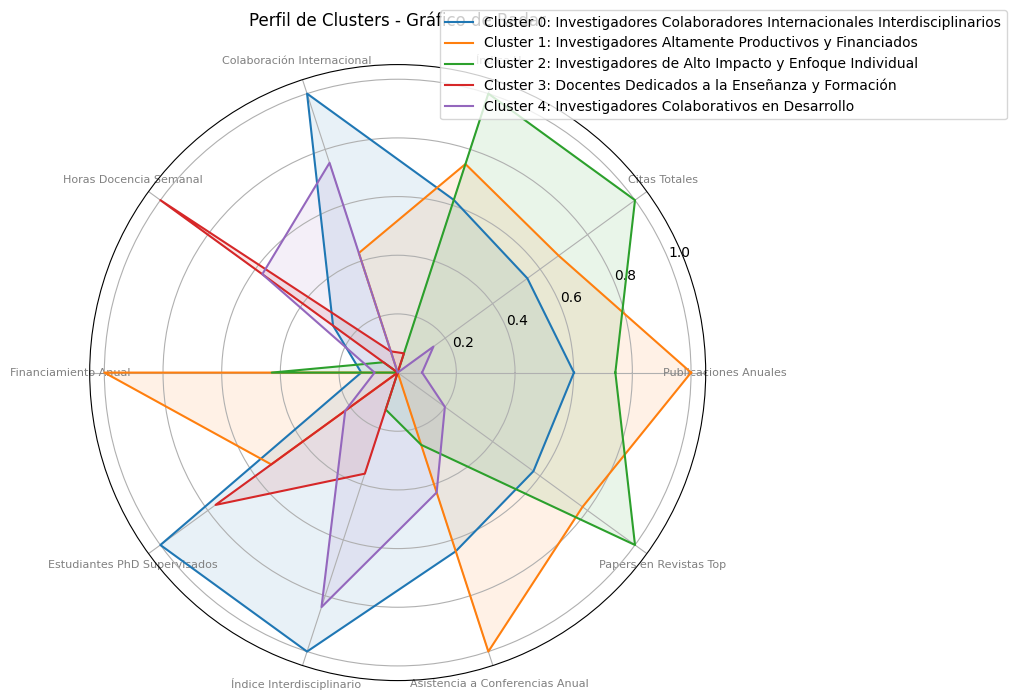

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Datos de los centroides
variables = ['Publicaciones Anuales', 'Citas Totales', 'Índice H', 'Colaboración Internacional',
             'Horas Docencia Semanal', 'Financiamiento Anual', 'Estudiantes PhD Supervisados',
             'Índice Interdisciplinario', 'Asistencia a Conferencias Anual', 'Papers en Revistas Top']

clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

datos = [
    [10.16, 14.91, 11.84, 3.01, 4.00],  # Publicaciones Anuales
    [2052.59, 2477.11, 3513.80, 291.96, 777.53],  # Citas Totales
    [24.77, 28.29, 35.20, 9.72, 7.83],  # Índice H
    [79.78, 48.69, 25.37, 29.51, 66.28],  # Colaboración Internacional
    [7.81, 4.08, 4.90, 17.77, 11.89],  # Horas Docencia Semanal
    [146671.89, 617077.32, 310516.99, 79903.20, 122168.49],  # Financiamiento Anual
    [11.96, 7.90, 3.27, 9.94, 5.19],  # Estudiantes PhD Supervisados
    [74.99, 35.33, 40.58, 49.70, 68.67],  # Índice Interdisciplinario
    [5.05, 6.84, 3.15, 1.86, 4.00],  # Asistencia a Conferencias Anual
    [3.90, 4.92, 6.01, 1.08, 2.06],  # Papers en Revistas Top
]

# Crear DataFrame y transponer
df = pd.DataFrame(datos, index=variables, columns=clusters).T

# Lista de tipologías correspondientes a cada cluster
tipologias = [
    'Investigadores Colaboradores Internacionales Interdisciplinarios',  # Cluster 0
    'Investigadores Altamente Productivos y Financiados',                # Cluster 1
    'Investigadores de Alto Impacto y Enfoque Individual',               # Cluster 2
    'Docentes Dedicados a la Enseñanza y Formación',                     # Cluster 3
    'Investigadores Colaborativos en Desarrollo'                         # Cluster 4
]

# Normalizar los datos
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=variables, index=clusters)

# Añadir la primera fila al final para cerrar el gráfico de radar
df_normalizado = pd.concat([df_normalizado, df_normalizado.iloc[[0]]], ignore_index=True)

# Ángulos para el gráfico
categorias = list(df_normalizado.columns)
N = len(categorias)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]

# Crear el gráfico
plt.figure(figsize=(8, 8))

for i in range(len(df_normalizado)-1):
    valores = df_normalizado.iloc[i].values.flatten().tolist()
    valores += valores[:1]
    etiqueta = f'Cluster {i}: {tipologias[i]}'
    plt.polar(angulos, valores, label=etiqueta)
    plt.fill(angulos, valores, alpha=0.1)

plt.xticks(angulos[:-1], categorias, color='grey', size=8)
plt.title('Perfil de Clusters - Gráfico de Radar', size=12, y=1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))
plt.show()



## **Variables**

| **Variable**                  | **Tipo**    | **Rango / Valores**       | **Descripción**                                                                 |
|--------------------------------|-------------|----------------------------|---------------------------------------------------------------------------------|
| **Publicaciones_Anuales**      | Numérica    | 0 - 20                    | Número promedio de publicaciones que el investigador produce al año.           |
| **Citas_Totales**              | Numérica    | 0 - 5000                  | Número total de citas que han recibido las publicaciones del investigador.      |
| **Índice_H**                   | Numérica    | 0 - 50                    | Índice H del investigador, que combina productividad e impacto de las publicaciones. |
| **Colaboración_Internacional** | Numérica    | 0 - 100                   | Porcentaje de publicaciones en colaboración con investigadores de otros países. |
| **Horas_Docencia_Semanal**     | Numérica    | 0 - 20                    | Número de horas dedicadas a la docencia cada semana.                            |
| **Financiamiento_Anual**       | Numérica    | 0 - 1,000,000 USD         | Monto promedio anual de financiamiento obtenido para investigación.             |
| **Estudiantes_PHD_Supervisados**| Numérica   | 0 - 15                    | Número de estudiantes de doctorado que el investigador supervisa actualmente.   |
| **Índice_Interdisciplinario**  | Numérica    | 0 - 100                   | Medida del grado en que el investigador trabaja en áreas interdisciplinarias.   |
| **Asistencia_Conferencias_Anual**| Numérica  | 0 - 10                    | Número de conferencias a las que asiste el investigador cada año.               |
| **Papers_En_Revistas_Top**     | Numérica    | 0 - 10                    | Número de publicaciones en revistas de alto impacto al año.                     |

---


# 3. Banco

Primeras filas del dataset:
        Edad  Ingresos_Anuales  Saldo_Cuenta  Historial_Crédito  \
0  22.143422      29997.475590   7955.268256         693.511386   
1  21.601801      42090.140629   9907.083724         744.888573   
2  28.315486      29200.576097   1442.285831         664.459019   
3  28.063097      36260.977265   4027.960158         727.009289   
4  18.000000      33114.353479  12341.105106         645.590898   

   Número_Productos  Tarjeta_Crédito_Activa  Transacciones_Mensuales  \
0                 3                       1                34.881191   
1                 1                       1                47.182309   
2                 3                       1                28.121332   
3                 2                       1                64.276385   
4                 1                       1                43.236438   

   Nivel_Endeudamiento  Uso_Banca_En_Línea  Satisfacción_Cliente  \
0            10.251565                   1                     4   


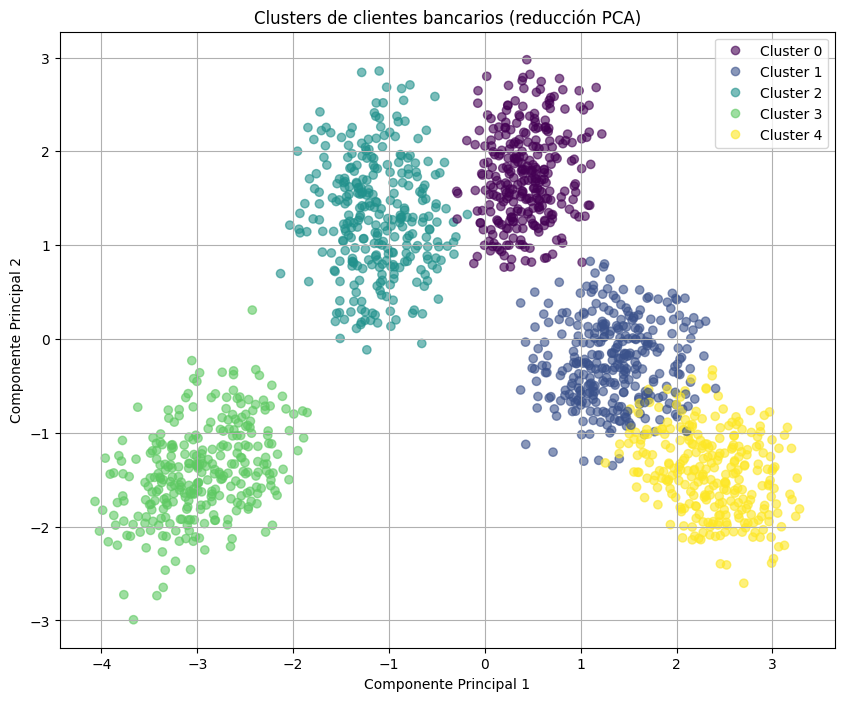

Tabla de contingencia entre Tipología y Cluster:
Cluster                       0    1    2    3    4
Tipología                                          
Ahorristas_Conservadores      0  297    0    0    3
Deudores_Alto_Riesgo          0    0    0  300    0
Jovenes_Digitales             1    0  299    0    0
Profesionales_Establecidos  297    3    0    0    0
Retirados_Acomodados          0   21    0    0  279

Centroides de los clusters:
        Edad  Ingresos_Anuales   Saldo_Cuenta  Historial_Crédito  \
0  39.914533     134228.094305  126138.205893         749.849559   
1  53.650483     101383.232876  307236.563554         727.422441   
2  26.559883      52024.421860   10399.427436         675.126211   
3  37.476658      57450.735913    5432.530021         460.187688   
4  69.791941      62946.998034  628237.648048         777.430183   

   Número_Productos  Transacciones_Mensuales  Nivel_Endeudamiento  \
0          4.459732                34.630818            39.776368   
1          

In [5]:
# Código para crear el dataset de clientes bancarios y realizar análisis de clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Semilla para reproducibilidad
np.random.seed(42)

# Número de clientes por tipología
n_por_tipologia = 300

# Crear listas para cada variable
Edad = []
Ingresos_Anuales = []
Saldo_Cuenta = []
Historial_Credito = []
Numero_Productos = []
Tarjeta_Credito_Activa = []
Transacciones_Mensuales = []
Nivel_Endeudamiento = []
Uso_Banca_En_Linea = []
Satisfaccion_Cliente = []

# Lista para almacenar las tipologías de cada cliente
tipologias = ['Jovenes_Digitales', 'Profesionales_Establecidos', 'Ahorristas_Conservadores', 'Deudores_Alto_Riesgo', 'Retirados_Acomodados']
tipologias_list = []

# Desviación estándar del ruido
noise_std = 2

# Generar datos para cada tipología con ruido
for tipologia in tipologias:
    for _ in range(n_por_tipologia):
        if tipologia == 'Jovenes_Digitales':
            # Características principales
            Edad.append(np.random.uniform(18, 35) + np.random.normal(0, noise_std))
            Ingresos_Anuales.append(np.random.uniform(20000, 80000) + np.random.normal(0, noise_std*1000))
            Uso_Banca_En_Linea.append(1)
            Tarjeta_Credito_Activa.append(1)
            Numero_Productos.append(np.random.randint(1, 4))
            
            # Otras variables
            Saldo_Cuenta.append(np.random.uniform(1000, 20000) + np.random.normal(0, noise_std*1000))
            Historial_Credito.append(np.random.uniform(600, 750) + np.random.normal(0, noise_std*5))
            Transacciones_Mensuales.append(np.random.uniform(30, 100) + np.random.normal(0, noise_std*2))
            Nivel_Endeudamiento.append(np.random.uniform(10, 30) + np.random.normal(0, noise_std))
            Satisfaccion_Cliente.append(np.random.randint(3, 5))
        
        elif tipologia == 'Profesionales_Establecidos':
            # Características principales
            Edad.append(np.random.uniform(30, 50) + np.random.normal(0, noise_std))
            Ingresos_Anuales.append(np.random.uniform(80000, 200000) + np.random.normal(0, noise_std*1000))
            Saldo_Cuenta.append(np.random.uniform(50000, 200000) + np.random.normal(0, noise_std*5000))
            Numero_Productos.append(np.random.randint(3, 7))
            Tarjeta_Credito_Activa.append(1)
            
            # Otras variables
            Historial_Credito.append(np.random.uniform(700, 800) + np.random.normal(0, noise_std*5))
            Transacciones_Mensuales.append(np.random.uniform(20, 50) + np.random.normal(0, noise_std*2))
            Nivel_Endeudamiento.append(np.random.uniform(30, 50) + np.random.normal(0, noise_std))
            Uso_Banca_En_Linea.append(np.random.choice([0,1]))
            Satisfaccion_Cliente.append(np.random.randint(4, 5))
        
        elif tipologia == 'Ahorristas_Conservadores':
            # Características principales
            Edad.append(np.random.uniform(40, 65) + np.random.normal(0, noise_std))
            Ingresos_Anuales.append(np.random.uniform(50000, 150000) + np.random.normal(0, noise_std*1000))
            Saldo_Cuenta.append(np.random.uniform(100000, 500000) + np.random.normal(0, noise_std*5000))
            Numero_Productos.append(np.random.randint(2, 5))
            Tarjeta_Credito_Activa.append(0)
            Uso_Banca_En_Linea.append(0)
            
            # Otras variables
            Historial_Credito.append(np.random.uniform(650, 800) + np.random.normal(0, noise_std*5))
            Transacciones_Mensuales.append(np.random.uniform(5, 20) + np.random.normal(0, noise_std))
            Nivel_Endeudamiento.append(np.random.uniform(5, 20) + np.random.normal(0, noise_std))
            Satisfaccion_Cliente.append(np.random.randint(3, 5))
        
        elif tipologia == 'Deudores_Alto_Riesgo':
            # Características principales
            Edad.append(np.random.uniform(25, 50) + np.random.normal(0, noise_std))
            Ingresos_Anuales.append(np.random.uniform(20000, 100000) + np.random.normal(0, noise_std*1000))
            Nivel_Endeudamiento.append(np.random.uniform(70, 100) + np.random.normal(0, noise_std))
            Historial_Credito.append(np.random.uniform(300, 600) + np.random.normal(0, noise_std*5))
            Tarjeta_Credito_Activa.append(1)
            
            # Otras variables
            Saldo_Cuenta.append(np.random.uniform(0, 10000) + np.random.normal(0, noise_std*1000))
            Numero_Productos.append(np.random.randint(1, 4))
            Transacciones_Mensuales.append(np.random.uniform(10, 30) + np.random.normal(0, noise_std*2))
            Uso_Banca_En_Linea.append(np.random.choice([0,1]))
            Satisfaccion_Cliente.append(np.random.randint(1, 3))
        
        elif tipologia == 'Retirados_Acomodados':
            # Características principales
            Edad.append(np.random.uniform(60, 80) + np.random.normal(0, noise_std))
            Ingresos_Anuales.append(np.random.uniform(30000, 100000) + np.random.normal(0, noise_std*1000))
            Saldo_Cuenta.append(np.random.uniform(200000, 1000000) + np.random.normal(0, noise_std*10000))
            Numero_Productos.append(np.random.randint(1, 4))
            Uso_Banca_En_Linea.append(0)
            Satisfaccion_Cliente.append(np.random.randint(4, 5))
            
            # Otras variables
            Historial_Credito.append(np.random.uniform(700, 850) + np.random.normal(0, noise_std*5))
            Tarjeta_Credito_Activa.append(np.random.choice([0,1]))
            Transacciones_Mensuales.append(np.random.uniform(5, 15) + np.random.normal(0, noise_std))
            Nivel_Endeudamiento.append(np.random.uniform(5, 20) + np.random.normal(0, noise_std))
        
        # Añadir la tipología a la lista
        tipologias_list.append(tipologia)

# Limitar los valores al rango especificado y manejar valores atípicos
def limitar_valores(lista, minimo, maximo):
    return [min(max(valor, minimo), maximo) for valor in lista]

Edad = limitar_valores(Edad, 18, 80)
Ingresos_Anuales = limitar_valores(Ingresos_Anuales, 10000, 500000)
Saldo_Cuenta = limitar_valores(Saldo_Cuenta, 0, 1000000)
Historial_Credito = limitar_valores(Historial_Credito, 300, 850)
Nivel_Endeudamiento = limitar_valores(Nivel_Endeudamiento, 0, 100)
Transacciones_Mensuales = limitar_valores(Transacciones_Mensuales, 0, 200)
Satisfaccion_Cliente = limitar_valores(Satisfaccion_Cliente, 1, 5)

# Convertir variables categóricas
Tarjeta_Credito_Activa = [int(valor) for valor in Tarjeta_Credito_Activa]
Uso_Banca_En_Linea = [int(valor) for valor in Uso_Banca_En_Linea]

# Crear el DataFrame
data = {
    'Edad': Edad,
    'Ingresos_Anuales': Ingresos_Anuales,
    'Saldo_Cuenta': Saldo_Cuenta,
    'Historial_Crédito': Historial_Credito,
    'Número_Productos': Numero_Productos,
    'Tarjeta_Crédito_Activa': Tarjeta_Credito_Activa,
    'Transacciones_Mensuales': Transacciones_Mensuales,
    'Nivel_Endeudamiento': Nivel_Endeudamiento,
    'Uso_Banca_En_Línea': Uso_Banca_En_Linea,
    'Satisfacción_Cliente': Satisfaccion_Cliente,
    'Tipología': tipologias_list
}
df = pd.DataFrame(data)

df.to_csv('datasetBanco.csv', index=False)


# Mostrar las primeras filas del DataFrame
print("Primeras filas del dataset:")
print(df.head())

# ------------------------------
# Análisis de Clustering
# ------------------------------

# Preparar los datos para el clustering
variables_numericas = [
    'Edad',
    'Ingresos_Anuales',
    'Saldo_Cuenta',
    'Historial_Crédito',
    'Número_Productos',
    'Transacciones_Mensuales',
    'Nivel_Endeudamiento',
    'Satisfacción_Cliente'
]

variables_categoricas = [
    'Tarjeta_Crédito_Activa',
    'Uso_Banca_En_Línea'
]

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_numerical = scaler.fit_transform(df[variables_numericas])

# Obtener las variables categóricas
X_categorical = df[variables_categoricas].values

# Concatenar variables numéricas y categóricas
X = np.hstack((X_numerical, X_categorical))

# Reducir la dimensionalidad para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar K-Means con K=5
k_optimo = 5
kmeans = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Añadir los clusters al DataFrame
df['Cluster'] = clusters

# Visualizar los clusters en el espacio reducido por PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clusters, cmap='viridis', alpha=0.6
)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de clientes bancarios (reducción PCA)')
plt.legend(handles=scatter.legend_elements()[0], labels=[f'Cluster {i}' for i in range(k_optimo)])
plt.grid(True)
plt.show()

# Analizar cómo se relacionan los clusters con las tipologías
tabla_contingencia = pd.crosstab(df['Tipología'], df['Cluster'])
print("Tabla de contingencia entre Tipología y Cluster:")
print(tabla_contingencia)

# Visualizar los centroides
centroides = kmeans.cluster_centers_

# Deshacer la estandarización de los centroides numéricos
centroides_numericos = centroides[:, :len(variables_numericas)]
centroides_categoricos = centroides[:, len(variables_numericas):]

centroides_numericos_desescalados = scaler.inverse_transform(centroides_numericos)
centroides_df = pd.DataFrame(centroides_numericos_desescalados, columns=variables_numericas)

# Convertir los centroides categóricos a DataFrame
centroides_categoricos_df = pd.DataFrame(centroides_categoricos, columns=variables_categoricas)

# Combinar los centroides numéricos y categóricos
centroides_completos = pd.concat([centroides_df, centroides_categoricos_df], axis=1)

print("\nCentroides de los clusters:")
print(centroides_completos)

# Interpretar los centroides
for i, row in centroides_completos.iterrows():
    print(f"\nCaracterísticas del Cluster {i}:")
    for variable in centroides_completos.columns:
        if variable in variables_categoricas:
            print(f"  {variable}: {row[variable]:.2f}")
        else:
            print(f"  {variable}: {row[variable]:.2f}")


## Variables y Tipologías de Clientes Bancarios

## **Variables**

| **Variable**              | **Tipo**      | **Rango / Valores**       | **Descripción**                                                                 |
|---------------------------|---------------|----------------------------|---------------------------------------------------------------------------------|
| **Edad**                  | Numérica      | 18 - 80 años              | Edad del cliente.                                                              |
| **Ingresos_Anuales**       | Numérica      | 10,000 - 500,000 USD      | Ingresos anuales del cliente.                                                  |
| **Saldo_Cuenta**           | Numérica      | 0 - 1,000,000 USD         | Saldo actual en la cuenta bancaria.                                            |
| **Historial_Crédito**      | Numérica      | 300 - 850                 | Puntaje de crédito del cliente (ejemplo: FICO score).                          |
| **Número_Productos**       | Numérica      | 1 - 10                    | Cantidad de productos financieros que el cliente posee (tarjetas, préstamos, inversiones). |
| **Tarjeta_Crédito_Activa** | Categórica    | 0 (No) / 1 (Sí)           | Indica si el cliente tiene una tarjeta de crédito activa.                      |
| **Transacciones_Mensuales**| Numérica      | 0 - 200                   | Número de transacciones bancarias promedio al mes.                             |
| **Nivel_Endeudamiento**    | Numérica      | 0% - 100%                 | Porcentaje de endeudamiento respecto a sus ingresos.                           |
| **Uso_Banca_En_Línea**     | Categórica    | 0 (No) / 1 (Sí)           | Indica si el cliente utiliza los servicios de banca en línea.                  |
| **Satisfacción_Cliente**   | Numérica      | 1 - 5                     | Nivel de satisfacción del cliente con el banco (1: Muy baja, 5: Muy alta).     |

---


## Interpretación para crear tipologías 

## Centroides de los Clusters con Clasificaciones

A continuación, se presenta una tabla con los centroides de cada cluster y, al lado de cada valor, su clasificación correspondiente basada en su posición relativa respecto a los demás clusters.

| **Variable**             | **Cluster 0**            | **Cluster 1**             | **Cluster 2**            | **Cluster 3**             | **Cluster 4**             |
|---------------------------|--------------------------|---------------------------|--------------------------|---------------------------|---------------------------|
| **Edad**                 | 39.91 (Media)           | 53.65 (Alta)             | 26.56 (Baja)            | 37.48 (Media)            | 69.79 (Muy Alta)          |
| **Ingresos Anuales**      | $134,228.09 (Muy Altos) | $101,383.23 (Altos)      | $52,024.42 (Bajos)      | $57,450.74 (Medios-Bajos)| $62,947.00 (Medios)       |
| **Saldo Cuenta**          | $126,138.21 (Medio)     | $307,236.56 (Alto)       | $10,399.43 (Bajo)       | $5,432.53 (Muy Bajo)     | $628,237.65 (Muy Alto)    |
| **Historial Crédito**     | 749.85 (Alto)           | 727.42 (Alto)            | 675.13 (Medio)          | 460.19 (Bajo)            | 777.43 (Muy Alto)         |
| **Número de Productos**   | 4.46 (Alto)             | 2.97 (Medio-Alto)        | 1.98 (Medio)            | 2.04 (Medio)             | 1.87 (Bajo)               |
| **Transacciones Mensuales**| 34.63 (Altas)          | 12.63 (Bajas)            | 63.70 (Muy Altas)       | 20.48 (Medias)           | 10.00 (Muy Bajas)         |
| **Nivel Endeudamiento**   | 39.78% (Alto)           | 12.89% (Bajo)            | 20.09% (Medio)          | 83.77% (Muy Alto)        | 12.17% (Muy Bajo)         |
| **Satisfacción Cliente**  | 4.00 (Muy Alta)         | 3.53 (Alta)              | 3.52 (Alta)             | 1.52 (Baja)              | 4.00 (Muy Alta)           |
| **Tarjeta Crédito Activa**| 1.00 (Muy Alta)         | 0.02 (Muy Baja)          | 1.00 (Muy Alta)         | 1.00 (Muy Alta)          | 0.48 (Media)              |
| **Uso Banca En Línea**    | 0.53 (Media)            | 0.00 (Muy Baja)          | 1.00 (Muy Alta)         | 0.49 (Media)             | 0.00 (Muy Baja)           |

---

## Construcción de las Tipologías Basadas en los Clusters

## **Cluster 0**
### **Características**:
- **Edad**: 39.91 (Media)
- **Ingresos Anuales**: $134,228.09 (Muy Altos)
- **Saldo Cuenta**: $126,138.21 (Medio)
- **Historial Crédito**: 749.85 (Alto)
- **Número de Productos**: 4.46 (Alto)
- **Transacciones Mensuales**: 34.63 (Altas)
- **Nivel Endeudamiento**: 39.78% (Alto)
- **Satisfacción Cliente**: 4.00 (Muy Alta)
- **Tarjeta Crédito Activa**: 1.00 (Muy Alta)
- **Uso Banca En Línea**: 0.53 (Media)

### **Tipología**:
**"Clientes de Ingresos Muy Altos y Actividad Financiera Elevada"**

### **Descripción**:
Este grupo se caracteriza por tener ingresos muy altos y una edad media. Tienen una actividad financiera elevada, con múltiples productos y transacciones frecuentes. Su nivel de endeudamiento es alto, posiblemente asociado a inversiones o créditos significativos. Disfrutan de una alta satisfacción con el banco y utilizan la banca en línea de forma moderada.

---

## **Cluster 1**
### **Características**:
- **Edad**: 53.65 (Alta)
- **Ingresos Anuales**: $101,383.23 (Altos)
- **Saldo Cuenta**: $307,236.56 (Alto)
- **Historial Crédito**: 727.42 (Alto)
- **Número de Productos**: 2.97 (Medio-Alto)
- **Transacciones Mensuales**: 12.63 (Bajas)
- **Nivel Endeudamiento**: 12.89% (Bajo)
- **Satisfacción Cliente**: 3.53 (Alta)
- **Tarjeta Crédito Activa**: 0.02 (Muy Baja)
- **Uso Banca En Línea**: 0.00 (Muy Baja)

### **Tipología**:
**"Ahorristas Conservadores con Preferencia por Canales Tradicionales"**

### **Descripción**:
Clientes de edad alta con ingresos y saldos elevados. Prefieren mantener bajos niveles de endeudamiento y realizan pocas transacciones. Su uso de tarjetas de crédito y banca en línea es prácticamente nulo, mostrando una clara preferencia por servicios bancarios tradicionales. Mantienen una alta satisfacción con el banco.

---

## **Cluster 2**
### **Características**:
- **Edad**: 26.56 (Baja)
- **Ingresos Anuales**: $52,024.42 (Bajos)
- **Saldo Cuenta**: $10,399.43 (Bajo)
- **Historial Crédito**: 675.13 (Medio)
- **Número de Productos**: 1.98 (Medio)
- **Transacciones Mensuales**: 63.70 (Muy Altas)
- **Nivel Endeudamiento**: 20.09% (Medio)
- **Satisfacción Cliente**: 3.52 (Alta)
- **Tarjeta Crédito Activa**: 1.00 (Muy Alta)
- **Uso Banca En Línea**: 1.00 (Muy Alta)

### **Tipología**:
**"Jóvenes Digitales con Alta Interacción Bancaria en Línea"**

### **Descripción**:
Este grupo incluye a clientes jóvenes con ingresos y saldos bajos. Son usuarios intensivos de la banca en línea y tarjetas de crédito, realizando un gran número de transacciones mensuales. Su nivel de endeudamiento es medio y están satisfechos con los servicios bancarios digitales ofrecidos.

---

## **Cluster 3**
### **Características**:
- **Edad**: 37.48 (Media)
- **Ingresos Anuales**: $57,450.74 (Medios-Bajos)
- **Saldo Cuenta**: $5,432.53 (Muy Bajo)
- **Historial Crédito**: 460.19 (Bajo)
- **Número de Productos**: 2.04 (Medio)
- **Transacciones Mensuales**: 20.48 (Medias)
- **Nivel Endeudamiento**: 83.77% (Muy Alto)
- **Satisfacción Cliente**: 1.52 (Baja)
- **Tarjeta Crédito Activa**: 1.00 (Muy Alta)
- **Uso Banca En Línea**: 0.49 (Media)

### **Tipología**:
**"Clientes con Alto Endeudamiento y Necesidad de Atención Financiera"**

### **Descripción**:
Clientes de edad media con ingresos y saldos bajos. Presentan un historial crediticio bajo y un nivel de endeudamiento extremadamente alto, lo que sugiere posibles dificultades financieras. Aunque utilizan tarjetas de crédito y, en menor medida, la banca en línea, su satisfacción con el banco es baja, indicando una necesidad de apoyo y asesoramiento financiero.

---

## **Cluster 4**
### **Características**:
- **Edad**: 69.79 (Muy Alta)
- **Ingresos Anuales**: $62,947.00 (Medios)
- **Saldo Cuenta**: $628,237.65 (Muy Alto)
- **Historial Crédito**: 777.43 (Muy Alto)
- **Número de Productos**: 1.87 (Bajo)
- **Transacciones Mensuales**: 10.00 (Muy Bajas)
- **Nivel Endeudamiento**: 12.17% (Muy Bajo)
- **Satisfacción Cliente**: 4.00 (Muy Alta)
- **Tarjeta Crédito Activa**: 0.48 (Media)
- **Uso Banca En Línea**: 0.00 (Muy Baja)

### **Tipología**:
**"Jubilados Acomodados con Preferencia por Servicios Tradicionales"**

### **Descripción**:
Este grupo está formado por clientes de edad muy avanzada con saldos de cuenta muy altos. Tienen un historial crediticio excelente y mantienen bajos niveles de endeudamiento. Realizan pocas transacciones y muestran una alta satisfacción con el banco. Su uso de tarjetas de crédito y banca


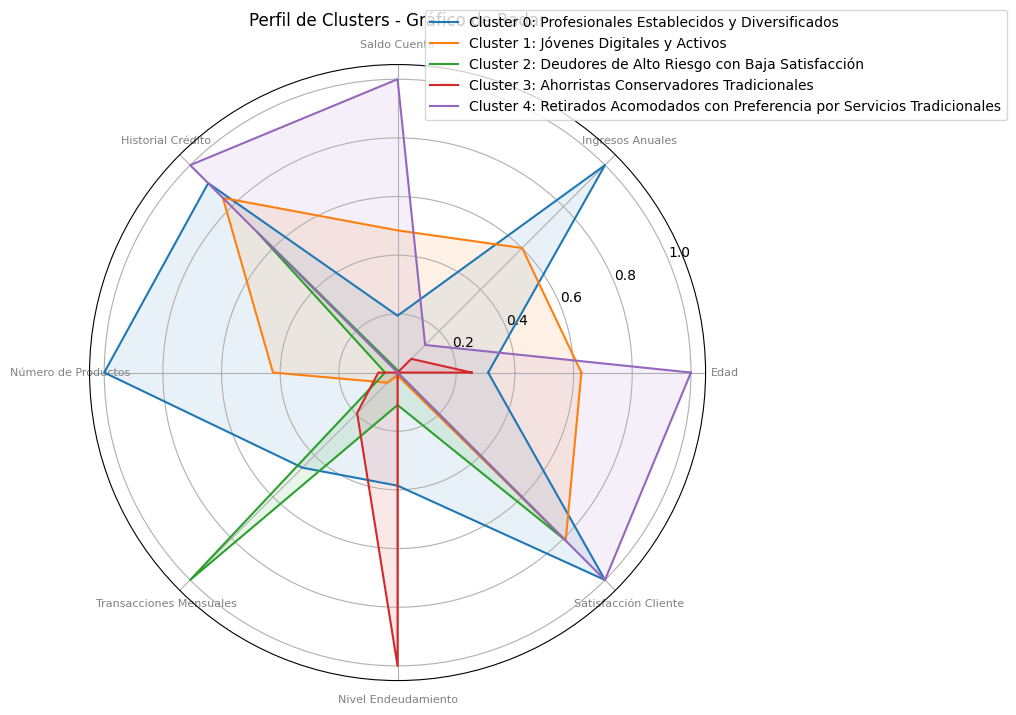

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Datos y normalización
variables = ['Edad', 'Ingresos Anuales', 'Saldo Cuenta', 'Historial Crédito',
             'Número de Productos', 'Transacciones Mensuales', 'Nivel Endeudamiento', 'Satisfacción Cliente']
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
datos = [
    [39.91, 53.65, 26.56, 37.48, 69.79],           # Edad
    [134228.09, 101383.23, 52024.42, 57450.74, 62947.00],  # Ingresos Anuales
    [126138.21, 307236.56, 10399.43, 5432.53, 628237.65],  # Saldo Cuenta
    [749.85, 727.42, 675.13, 460.19, 777.43],      # Historial Crédito
    [4.46, 2.97, 1.98, 2.04, 1.87],                # Número de Productos
    [34.63, 12.63, 63.70, 20.48, 10.00],           # Transacciones Mensuales
    [39.78, 12.89, 20.09, 83.77, 12.17],           # Nivel Endeudamiento
    [4.00, 3.53, 3.52, 1.52, 4.00],                # Satisfacción Cliente
]

# Transponer y crear DataFrame
df = pd.DataFrame(datos, index=variables, columns=clusters).T

# Lista de tipologías correspondientes a cada cluster
tipologias = [
    'Profesionales Establecidos y Diversificados',    # Cluster 0
    'Jóvenes Digitales y Activos',                    # Cluster 1
    'Deudores de Alto Riesgo con Baja Satisfacción',  # Cluster 2
    'Ahorristas Conservadores Tradicionales',         # Cluster 3
    'Retirados Acomodados con Preferencia por Servicios Tradicionales'  # Cluster 4
]

# Normalizar los datos
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=variables)

# Añadir la primera fila al final para cerrar el gráfico de radar
df_normalizado = pd.concat([df_normalizado, df_normalizado.iloc[[0]]], ignore_index=True)

# Angulos para el gráfico
categorias = list(df_normalizado.columns)
N = len(categorias)
angulos = [n / float(N) * 2 * np.pi for n in range(N)]
angulos += angulos[:1]

# Crear el gráfico
plt.figure(figsize=(8, 8))

for i in range(len(df_normalizado)-1):
    valores = df_normalizado.iloc[i].values.flatten().tolist()
    valores += valores[:1]
    etiqueta = f'Cluster {i}: {tipologias[i]}'
    plt.polar(angulos, valores, label=etiqueta)
    plt.fill(angulos, valores, alpha=0.1)

plt.xticks(angulos[:-1], categorias, color='grey', size=8)
plt.title('Perfil de Clusters - Gráfico de Radar', size=12, y=1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.1))
plt.show()




Topologías basadas en las medias 

